<a href="https://colab.research.google.com/github/accenggg/PDAB_Kelompok4_UAS/blob/main/UAS_DATMIN_Sentiment_Analys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

## Library

In [290]:
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-k1kfvua3
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-k1kfvua3
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit c3b216c3cb8593513a018eb3ec4fd6f18d3aba5b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [291]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [292]:
!pip install translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [293]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [294]:
import pandas as pd
import snscrape.modules. twitter as sntwitter
import re
from textblob import TextBlob
from translate import Translator

In [318]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [296]:
from sklearn.model_selection import train_test_split

## Code

### Data Preparation

Data diambil dari twitter terkait HAM pada tahun 2022

In [250]:
hasilSearch=sntwitter.TwitterSearchScraper('"Human Rights" since:2022-01-01 until:2022-12-31')

In [251]:
hasilSearch

#### Simpan data dari twitter

In [252]:
tweet_data=[]
for i,tweet in enumerate(hasilSearch.get_items()):
    tweet_list=[tweet.date,
            tweet.user.username,
            tweet.content]
    tweet_data.append(tweet_list)
    tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.content).split())
    
    analysis = TextBlob(tweet_bersih)

    if analysis.sentiment.polarity > 0.0:
      tweet_list.append('positif')
    elif analysis.sentiment.polarity == 0.0:
      tweet_list.append('netral')
    else:
      tweet_list.append('negatif')

    # if tweet.retweetCount > 0:
    #   if tweet_list not in tweet_data:
    #     tweet_data.append(tweet_list)
    # else:
    #   tweet_data.append(tweet_list)

    if i==249 :
        break

<ipython-input-252-e522a3ccdeec>:5: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet.content]
<ipython-input-252-e522a3ccdeec>:7: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.content).split())


> Data yang diambil

In [253]:
tweet_data

[[datetime.datetime(2022, 12, 30, 23, 59, 44, tzinfo=datetime.timezone.utc),
  'UmeshSimply',
  '@AmyMek human rights...',
  'netral'],
 [datetime.datetime(2022, 12, 30, 23, 59, 26, tzinfo=datetime.timezone.utc),
  'MiguelDelaney',
  '@stewartflaherty how does that contradict the "human rights talk" - please explain.',
  'netral'],
 [datetime.datetime(2022, 12, 30, 23, 59, 9, tzinfo=datetime.timezone.utc),
  'pass_blue',
  '#4 An Israeli campaign blocks an award to Navi Pillay, ex-UN high commissioner for human rights\nhttps://t.co/5PzFseUNVp',
  'positif'],
 [datetime.datetime(2022, 12, 30, 23, 58, 44, tzinfo=datetime.timezone.utc),
  'riversofgoId',
  "@effervescewolf #WOLF: I don't care about human rights. I only care about mpreg rights",
  'netral'],
 [datetime.datetime(2022, 12, 30, 23, 58, 44, tzinfo=datetime.timezone.utc),
  'KGmarshine',
  'trans rights are human rights',
  'netral'],
 [datetime.datetime(2022, 12, 30, 23, 58, 36, tzinfo=datetime.timezone.utc),
  'Sproutfuel2',


#### Membuat DF untuk Data dari twitter

In [254]:
tweet_df= pd.DataFrame(tweet_data, columns=['date', 'user','tweet','sentiment'])

In [255]:
tweet_df

,date,user,tweet,sentiment
0,2022-12-30 23:59:44+00:00,UmeshSimply,@AmyMek human rights...,netral
1,2022-12-30 23:59:26+00:00,MiguelDelaney,@stewartflaherty how does that contradict the ...,netral
2,2022-12-30 23:59:09+00:00,pass_blue,#4 An Israeli campaign blocks an award to Navi...,positif
3,2022-12-30 23:58:44+00:00,riversofgoId,@effervescewolf #WOLF: I don't care about huma...,netral
4,2022-12-30 23:58:44+00:00,KGmarshine,trans rights are human rights,netral
...,...,...,...,...
245,2022-12-30 22:50:47+00:00,JoePopulista,@elonmusk @ScottAdamsSays And yet their action...,positif
246,2022-12-30 22:50:10+00:00,Applebear1976,@ScotExpress Knew this was coming.. next there...,positif
247,2022-12-30 22:50:08+00:00,captain_windsor,@niallw666 @cjhumanrights Lol ...... Could've...,positif
248,2022-12-30 22:50:07+00:00,JANGO1993,@richyhlfc @DeadlineDayLive Portugal human rig...,netral


#### Labelling

In [256]:
tweet_positif = [t for t in tweet_data if t[3] == 'positif']
tweet_netral = [t for t in tweet_data if t[3] == 'netral']
tweet_negatif = [t for t in tweet_data if t[3] == 'negatif']

In [257]:
print(f"""Hasil Sentimen
positif : {len(tweet_positif)}
netral : {len(tweet_netral)}
negatif : {len(tweet_negatif)}
""")

Hasil Sentimen
positif : 112
netral : 68
negatif : 70



Ini merupakan jumlah hasil sentimen, dengan penggolongan data menjadi 3, yaitu positif, netral, dan negatif. Total : 250

In [258]:
positif_tweets_df = tweet_df.loc[tweet_df['sentiment'] == 'positif']
positif_tweets_df

,date,user,tweet,sentiment
2,2022-12-30 23:59:09+00:00,pass_blue,#4 An Israeli campaign blocks an award to Navi...,positif
8,2022-12-30 23:58:14+00:00,sofiazozu,@dumielauxepices @JNObireed @Shayan86 @AlNassr...,positif
9,2022-12-30 23:57:54+00:00,gaudiumeng,Ortega Seeks to ‘Destroy the Catholic Church i...,positif
12,2022-12-30 23:55:57+00:00,stewartflaherty,"@MiguelDelaney Yeah, you were a beacon of huma...",positif
13,2022-12-30 23:55:34+00:00,juddmin,@Bbmorg Why should the humans rights of Brits ...,positif
...,...,...,...,...
242,2022-12-30 22:51:27+00:00,JamesHi68339161,@NicholasTyrone Obviously not leaving the Euro...,positif
245,2022-12-30 22:50:47+00:00,JoePopulista,@elonmusk @ScottAdamsSays And yet their action...,positif
246,2022-12-30 22:50:10+00:00,Applebear1976,@ScotExpress Knew this was coming.. next there...,positif
247,2022-12-30 22:50:08+00:00,captain_windsor,@niallw666 @cjhumanrights Lol ...... Could've...,positif


In [259]:
netral_tweets_df = tweet_df.loc[tweet_df['sentiment'] == 'netral']
netral_tweets_df

,date,user,tweet,sentiment
0,2022-12-30 23:59:44+00:00,UmeshSimply,@AmyMek human rights...,netral
1,2022-12-30 23:59:26+00:00,MiguelDelaney,@stewartflaherty how does that contradict the ...,netral
3,2022-12-30 23:58:44+00:00,riversofgoId,@effervescewolf #WOLF: I don't care about huma...,netral
4,2022-12-30 23:58:44+00:00,KGmarshine,trans rights are human rights,netral
6,2022-12-30 23:58:32+00:00,emerangie,"@LMdiplo In the end, Human Rights, they don't ...",netral
...,...,...,...,...
235,2022-12-30 22:53:47+00:00,barbarapontec,"@ShimonLevit Ask @FranceskAlbs , the “impartia...",netral
240,2022-12-30 22:51:39+00:00,nucleus_jones,@LibFails Some constitutional rights are also ...,netral
243,2022-12-30 22:51:14+00:00,jackgibson29,@JNObireed @Shayan86 @AlNassrFC_EN @Cristiano ...,netral
244,2022-12-30 22:50:59+00:00,oleh_spivak,"J.Carter\n"" . freedom of speech and human righ...",netral


In [260]:
negatif_tweets_df = tweet_df.loc[tweet_df['sentiment'] == 'negatif']
negatif_tweets_df

,date,user,tweet,sentiment
5,2022-12-30 23:58:36+00:00,Sproutfuel2,Will try to post 1-2x a week at Substack.\nCan...,negatif
10,2022-12-30 23:57:53+00:00,emmalmc69,@RNGebhardt @ianclayton0 But why educate aroun...,negatif
11,2022-12-30 23:57:05+00:00,Jambareeqi,"@CocoaFox023 ""Elon owns people who I've stereo...",negatif
17,2022-12-30 23:53:41+00:00,OrdinaryAnwaar,@ambedkariteIND Opinion: It seems that one out...,negatif
18,2022-12-30 23:53:25+00:00,Lila142007,UN member states voted against #Ethiopia’s at...,negatif
...,...,...,...,...
222,2022-12-30 22:55:51+00:00,hendersam2022,A YOUNG MAN FIGHTING FOR HUMAN RIGHTS AND FREE...,negatif
228,2022-12-30 22:54:25+00:00,hey_ter,TONIGHT @ 4:30pm PT/7:30pm ET on WTF is Going ...,negatif
230,2022-12-30 22:54:14+00:00,krimcl,I cry myself to sleep every night over all the...,negatif
236,2022-12-30 22:53:32+00:00,JepoyDizon1228,@_E_G_G_BOI_419_ @azucocodesu Minors where? Wh...,negatif


#### Cleaning Text

> Membersihkan karakter-karakter yang tidak diperlukan dan negara

In [261]:
import re

# Daftar nama-nama negara dalam Bahasa Inggris
nama_negara = [
    'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
    'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
    'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
    'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
    'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador',
    'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
    'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
    'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
    'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Korea', 'Kosovo',
    'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya'
]

for i in range(len(tweet_df)):
    clean_tweet = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(\bt\s*co\b)|(https)|(" + "|".join(nama_negara) + ")", "", tweet_df['tweet'][i])
    tweet_df.loc[i, 'tweet'] = clean_tweet


Nama negara dihapus karena tidak diperlukan, untuk HAM kami hanya fokus pada konteks terkait topik, bukan negaranya

#### Positive Word

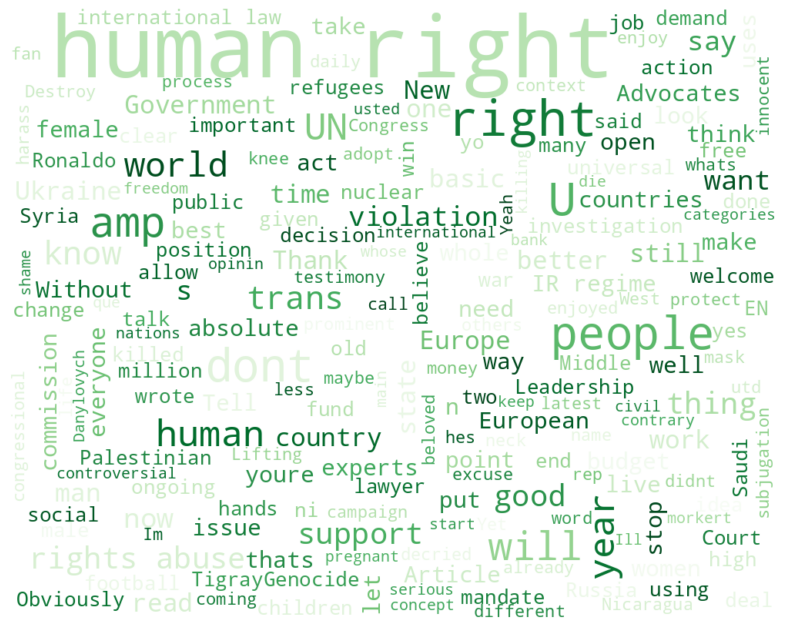

In [262]:
# wordcloud tweet sentiment positive
data_pos = tweet_df[tweet_df['sentiment'] == 'positif']

all_text = ' '.join(word for word in data_pos['tweet'])
wordcloud = WordCloud(colormap='Greens', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#### Netral Word

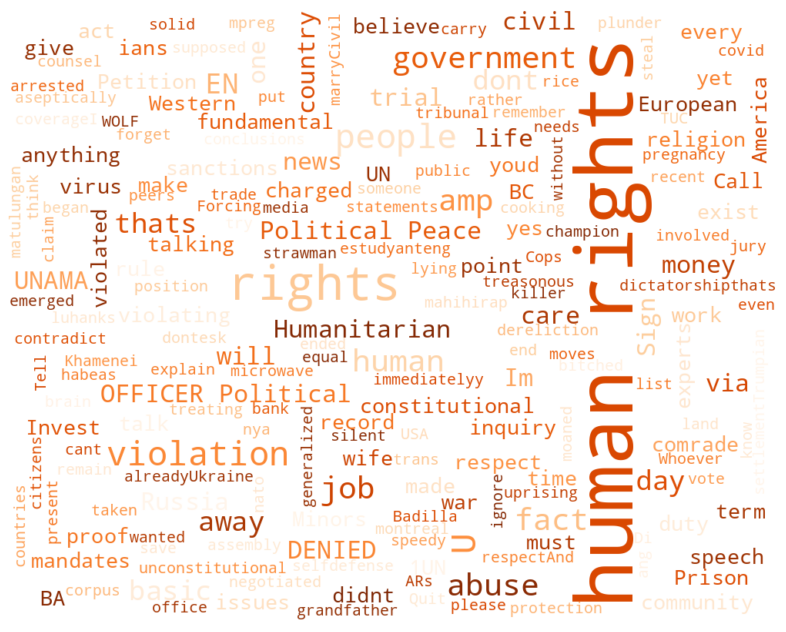

In [263]:
# wordcloud tweet sentiment netral
data_pos = tweet_df[tweet_df['sentiment'] == 'netral']

all_text = ' '.join(word for word in data_pos['tweet'])
wordcloud = WordCloud(colormap='Oranges', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#### Negative Word

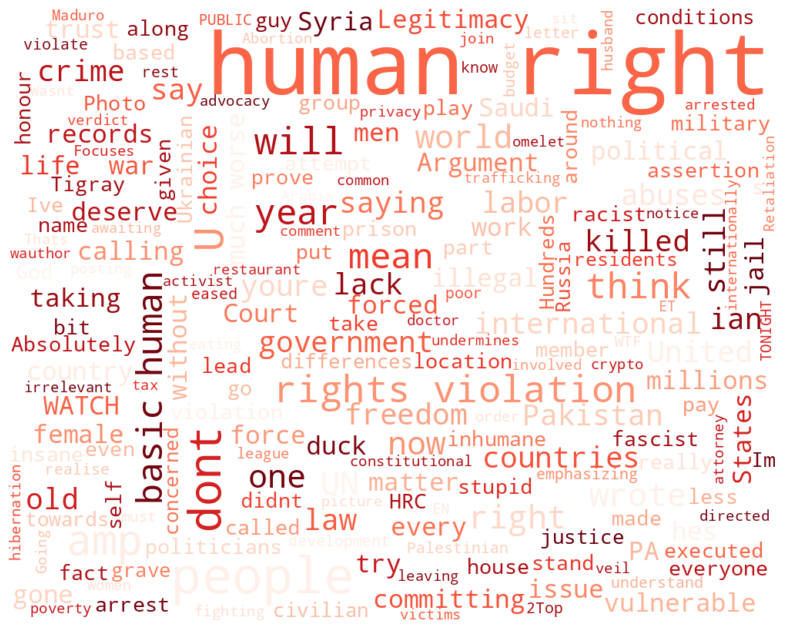

In [264]:
# wordcloud tweet sentiment positive
data_pos = tweet_df[tweet_df['sentiment'] == 'negatif']

all_text = ' '.join(word for word in data_pos['tweet'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [265]:
#export dataset
# tweet_df.to_csv('tweet_human_right.csv', index=False)

### Modelling

#### Function

In [266]:
import nltk

import requests
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# CONSTRUCT STOPWORDS
rama_stopword = "https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/stopword.txt"
yutomo_stopword = "https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt"
fpmipa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/fpmipa-stopwords.txt"
sastrawi_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/sastrawi-stopwords.txt"
aliakbar_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/aliakbars-bilp.txt"
pebahasa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/pebbie-pebahasa.txt"
elang_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-id.txt"
nltk_stopword = stopwords.words('indonesian')

# create path url for each stopword
path_stopwords = [rama_stopword, yutomo_stopword, fpmipa_stopword, sastrawi_stopword, 
                  aliakbar_stopword, pebahasa_stopword, elang_stopword]

# combine stopwords
stopwords_l = nltk_stopword
for path in path_stopwords:
    response = requests.get(path)
    stopwords_l += response.text.split('\n')

custom_st = '''
yg yang dgn ane smpai bgt gua gwa si tu ama utk udh btw
ntar lol ttg emg aj aja tll sy sih kalo nya trsa mnrt nih
ma dr ajaa tp akan bs bikin kta pas pdahl bnyak guys abis tnx
bang banget nang mas amat bangettt tjoy hemm haha sllu hrs lanjut
bgtu sbnrnya trjadi bgtu pdhl gt https sm plg skrg 
'''

# create dictionary with unique stopword
st_words = set(stopwords_l)
custom_stopword = set(custom_st.split())

# result stopwords
stop_words = st_words | custom_stopword
print(f'Stopwords: {list(stop_words)[:5]}')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Stopwords: ['diperbuat', 'memang', 'sendirian', 'asal', 'keseluruhannya']


In [267]:
import re
def cleaning_text(text):
    # remove url
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text =  url_pattern.sub(r'', text)

    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)

    # remove mention handle user (@)
    text = re.sub(r'@[\w]*', ' ', text)

    # remove punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, " ") 
    
    # remove extra whitespace
    text = text.strip()

    # lowercase
    text = text.lower()
    return text

In [268]:
# remove stopwords
from nltk import word_tokenize, sent_tokenize

def remove_stopword(text, stop_words=stop_words):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

In [269]:
# stemming and lemmatization
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming_and_lemmatization(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

In [270]:
# tokenization
def tokenize(text):
    return word_tokenize(text)

In [271]:
# pipeline preprocess
def preprocess(text):
    # cleaning text and lowercase
    output = cleaning_text(text)

    # remove stopwords
    output = remove_stopword(output)

    # stemming and lemmatization
    output = stemming_and_lemmatization(output)

    # tokenization
    output = tokenize(output)

    return output

#### Preprocessing

In [272]:
# implement preprocessing
preprocessed_data = tweet_df.copy()
preprocessed_data['Text Tweet'] = tweet_df['tweet'].map(preprocess)

#### Split Train & Test

In [287]:
X = preprocessed_data['tweet']
y = preprocessed_data['sentiment']

y.head(20)

0      netral
1      netral
2     positif
3      netral
4      netral
5     negatif
6      netral
7      netral
8     positif
9     positif
10    negatif
11    negatif
12    positif
13    positif
14    positif
15     netral
16    positif
17    negatif
18    negatif
19    positif
Name: sentiment, dtype: object

In [288]:
# mapping, negatif = 0, netral = 1, positif = 2
y = y.map({'negatif':0, 'netral':1, 'positif':2})
y.head(20)

0     1
1     1
2     2
3     1
4     1
5     0
6     1
7     1
8     2
9     2
10    0
11    0
12    2
13    2
14    2
15    1
16    2
17    0
18    0
19    2
Name: sentiment, dtype: int64

In [297]:
train_x, test_x, train_y, test_y = train_test_split(X, y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=2021)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((225,), (225,), (25,), (25,))

#### Menghitung frekuensi setiap pasangan (kata, sentimen) dari kumpulan tweet dan label sentimen yang diberikan

In [298]:
def build_freqs(tweets, ys):
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in tweet:
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [299]:
# create vocabulary / dictionary frequencies
freqs = build_freqs(train_x.tolist(), train_y.tolist())

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 182


####  Menghasilkan vektor fitur berdimensi (1, 3) untuk satu tweet berdasarkan frekuensi kata-kata dalam tweet tersebut yang telah disimpan dalam kamus freqs.

In [300]:
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    # loop through each word in the list of words
    for word in tweet:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.),0)
        
    assert(x.shape == (1, 3))
    return x

In [301]:
# test extract features function
tmp = extract_features(train_x.to_numpy()[0], freqs)

print(f'text: {train_x.to_numpy()[0]}')
print(f'feature extraction result: {tmp}')

text:    EN   Western Human rights 
feature extraction result: [[1.0000e+00 1.7282e+04 3.1445e+04]]


In [302]:
# extract all of the features

# collect the features 'x' and stack them into a matrix 'X'
X_train = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X_train[i, :]= extract_features(train_x.to_numpy()[i], freqs)

X_train[:5]

array([[1.0000e+00, 1.7282e+04, 3.1445e+04],
       [1.0000e+00, 2.1152e+04, 3.8546e+04],
       [1.0000e+00, 5.2905e+04, 9.7724e+04],
       [1.0000e+00, 1.0306e+04, 1.8471e+04],
       [1.0000e+00, 3.4623e+04, 6.4090e+04]])

In [303]:
# collect the features 'x' and stack them into a matrix 'X'
X_test = np.zeros((len(test_x), 3))
for i in range(len(test_x)):
    X_test[i, :]= extract_features(test_x.to_numpy()[i], freqs)

#### Metrik Pengukuran yang dipakai

In [304]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

### Build Model

#### Random Forest

In [305]:
random_forest = RandomForestClassifier(n_estimators=100)

In [306]:
random_forest.fit(X_train, train_y)

RandomForestClassifier()

In [307]:
rf_predictions = random_forest.predict(X_test)

In [308]:
rf_probabilities = random_forest.predict_proba(X_test)[:, 1]

#### SVM

In [309]:
svm_model = SVC(kernel='linear', probability=True)

In [310]:
svm_model.fit(X_train, train_y)

SVC(kernel='linear', probability=True)

In [311]:
svm_predictions = svm_model.predict(X_test)

In [312]:
svm_probabilities = svm_model.predict_proba(X_test)[:, 1]

## Evaluation

### Menghitung Metrik evaluasi untuk Random Forest

In [313]:
rf_accuracy = accuracy_score(test_y, rf_predictions)
rf_precision = precision_score(test_y, rf_predictions, average='micro')
rf_recall = recall_score(test_y, rf_predictions, average='micro')
rf_f1 = f1_score(test_y, rf_predictions, average='micro')

#### Menghitung metrik evaluasi untuk SVM

In [314]:
svm_accuracy = accuracy_score(test_y, svm_predictions)
svm_precision = precision_score(test_y, svm_predictions, average='micro')
svm_recall = recall_score(test_y, svm_predictions, average='micro')
svm_f1 = f1_score(test_y, svm_predictions, average='micro')

##### RF CM

In [315]:
rf_cm = confusion_matrix(test_y, rf_predictions)

In [316]:
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

Text(50.722222222222214, 0.5, 'True Labels')

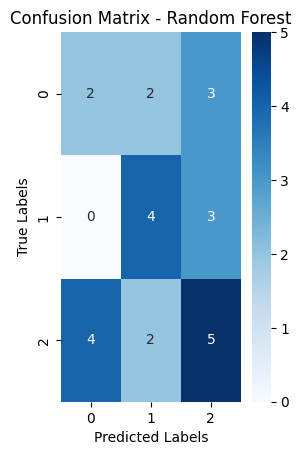

In [319]:
plt.subplot(1, 2, 1)
sns.heatmap(rf_cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

##### SVM CM

In [321]:
svm_cm = confusion_matrix(test_y, svm_predictions)

Text(321.26767676767673, 0.5, 'True Labels')

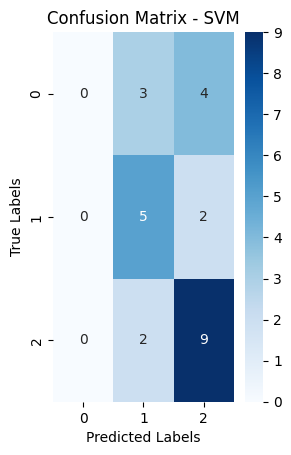

In [322]:
plt.subplot(1, 2, 2)
sns.heatmap(svm_cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

#### Visual Preparation

In [323]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1]

In [324]:
x = np.arange(len(labels))
width = 0.35

#### Model Comparison

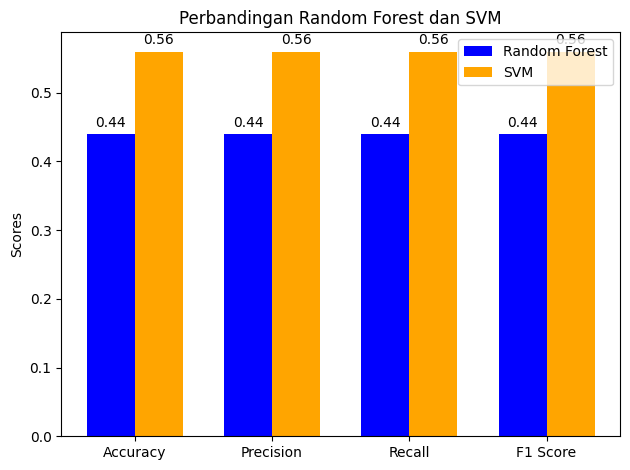

In [325]:
# Plotting
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest', color='blue')
rects2 = ax.bar(x + width/2, svm_scores, width, label='SVM', color='orange')

# Menambahkan nilai pada setiap batang
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Penyesuaian tampilan
ax.set_ylabel('Scores')
ax.set_title('Perbandingan Random Forest dan SVM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()